# dask.array Example

We're going to make our execution engine a local cluster from Dask `distributed` (so that we can view some of the nice diagnostics that are available).

In [1]:
from distributed import Client
client = Client("127.0.0.1:53731")

Standard import for `dask.array` is as `da`. 

In [2]:
import dask.array as da

Create a simple 2D guassian, chunked six times along each dimension:

In [3]:
x = da.random.standard_normal(size=(1500, 1500), chunks=(250, 250))

In [4]:
x

dask.array<standard_normal, shape=(1500, 1500), dtype=float64, chunksize=(250, 250), chunktype=numpy.ndarray>

A second array; now in three dimensions, chunked in a similar way:

In [5]:
y = da.random.standard_cauchy(size=(500, 1500, 1500), chunks=(250, 250, 250))

In [6]:
y

dask.array<standard_cauchy, shape=(500, 1500, 1500), dtype=float64, chunksize=(250, 250, 250), chunktype=numpy.ndarray>

Multiple operations in a single line:

- Absolute value
- Transpose
- Subtraction
- Sum reduction

In [7]:
z = (da.fabs(y) - x.T).sum()

In [8]:
z

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

Remember, at this point we've still only created tasks, no real calculations. We ask the client to execute the graph by calling `compute`:

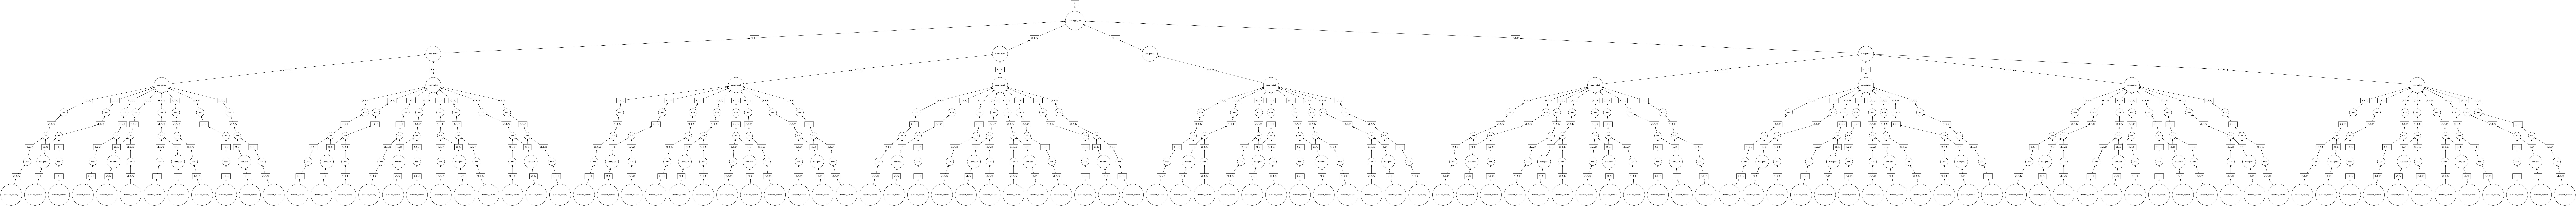

In [9]:
z.visualize()

In [10]:
z = client.compute(z)

In [11]:
z

<Future: pending, key: finalize-c6a970860a3d6fd602c603cf2b81fbee>

In [12]:
z.result()

15907042573.383497

A quick look at `dask.array` I/O:

In [13]:
z = (da.fabs(y) - x.T)

In [14]:
z

dask.array<sub, shape=(500, 1500, 1500), dtype=float64, chunksize=(250, 250, 250), chunktype=numpy.ndarray>

We store the chunked array with Zarr (a format for the storage of chunked, compressed, N-dimensional arrays). `to_zarr` is one of a number of Dask methods that is _not_ lazy by default (using `compute=False` will provide a lazy evaluation mechanism).

In [15]:
z.to_zarr("z.zarr", overwrite=True)

Reading the stored data back into an array is indeed lazy:

In [16]:
!ls z.zarr

0.0.0 0.1.0 0.2.0 0.3.0 0.4.0 0.5.0 1.0.0 1.1.0 1.2.0 1.3.0 1.4.0 1.5.0
0.0.1 0.1.1 0.2.1 0.3.1 0.4.1 0.5.1 1.0.1 1.1.1 1.2.1 1.3.1 1.4.1 1.5.1
0.0.2 0.1.2 0.2.2 0.3.2 0.4.2 0.5.2 1.0.2 1.1.2 1.2.2 1.3.2 1.4.2 1.5.2
0.0.3 0.1.3 0.2.3 0.3.3 0.4.3 0.5.3 1.0.3 1.1.3 1.2.3 1.3.3 1.4.3 1.5.3
0.0.4 0.1.4 0.2.4 0.3.4 0.4.4 0.5.4 1.0.4 1.1.4 1.2.4 1.3.4 1.4.4 1.5.4
0.0.5 0.1.5 0.2.5 0.3.5 0.4.5 0.5.5 1.0.5 1.1.5 1.2.5 1.3.5 1.4.5 1.5.5


In [17]:
z = da.from_zarr("z.zarr")

In [18]:
z

dask.array<from-zarr, shape=(500, 1500, 1500), dtype=float64, chunksize=(250, 250, 250), chunktype=numpy.ndarray>

In [19]:
z.sum().compute()

15907042573.383497